In [112]:
# loading module 

import pandas as pd

import numpy as np

from faker import Faker

import random

import mysql.connector

from getpass import getpass # helps to securly transfer password

import streamlit as st

from datetime import datetime

from mysql.connector import connect,Error

import mysql.connector as mysql

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline



In [41]:
import random
import datetime
import pandas as pd

# Sample categories and their items with price ranges
categories = {
    "Housing": {
        "Rent Payment": (8000, 30000),
        "Mortgage Payment": (10000, 40000),
        "Property Taxes": (1000, 5000),
        "Home Insurance": (500, 2000),
        "Home Repairs": (2000, 10000),
        "HOA Fees": (500, 3000),
        "Utilities Included": (0, 2000),
        "Home Security System": (1000, 5000),
        "Furnishings": (5000, 20000),
        "Appliance Purchases": (5000, 30000)
    },
    "Utilities": {
        "Electricity Bill": (500, 3000),
        "Water Bill": (200, 1000),
        "Gas Bill": (300, 1500),
        "Internet Service": (500, 2000),
        "Mobile Phone Bill": (300, 1500),
        "Waste Disposal Fees": (200, 500),
        "Cable TV Subscription": (500, 2000),
        "Sewer Charges": (200, 1000),
        "Home Heating Costs": (1000, 5000),
        "Maintenance Fees": (500, 2000)
    },
    "Transportation": {
        "Fuel Costs": (2000, 10000),
        "Public Transit Pass": (500, 1500),
        "Car Maintenance": (1000, 5000),
        "Car Insurance": (1000, 3000),
        "Parking Fees": (200, 1000),
        "Ride-Sharing Services": (300, 2000),
        "Vehicle Registration Fees": (500, 2000),
        "Toll Charges": (100, 500),
        "Bicycle Repairs": (200, 1000),
        "Car Loan Payment": (3000, 10000)
    },
    "Groceries": {
        "Fruits And Vegetables": (500, 2000),
        "Meat And Fish": (1000, 5000),
        "Dairy Products": (500, 2000),
        "Staple Grains": (300, 1500),
        "Snacks And Beverages": (300, 1500),
        "Cleaning Supplies": (500, 2000),
        "Frozen Foods": (300, 1500),
        "Baking Ingredients": (200, 1000),
        "Condiments And Spices": (200, 1000),
        "Organic Produce": (500, 3000)
    },
    "Dining Out": {
        "Dinner At A Restaurant": (800, 3000),
        "Lunch Takeaway": (200, 800),
        "Fast Food Meal": (150, 600),
        "Coffee Shop Visit": (100, 500),
        "Brunch With Friends": (300, 1200),
        "Special Occasion Dinner": (1000, 5000),
        "Street Food": (100, 500),
        "Buffet Meals": (500, 2000),
        "Desserts And Treats": (100, 500),
        "Beverages At Bars": (300, 1500),
        "Snacks From A Convenience Store": (100, 500)
    },
    "Subscriptions": {
        "Streaming Services": (300, 1000),
        "Digital Magazine Subscriptions": (100, 500),
        "Software Licenses": (500, 2000),
        "Gym Membership": (500, 3000),
        "Online Learning Platforms": (500, 5000),
        "Cloud Storage Services": (100, 500),
        "Meal Kit Subscriptions": (1000, 3000),
        "Gaming Subscriptions": (300, 1500),
        "Audiobook Services": (300, 1000),
        "News Websites Subscription": (200, 1000)
    },
    "Health & Fitness": {
        "Gym Membership": (500, 3000),
        "Medical Consultations": (500, 5000),
        "Health Insurance Premiums": (1000, 5000),
        "Yoga Classes": (200, 1000),
        "Nutritional Supplements": (500, 2000),
        "Physical Therapy Sessions": (500, 3000),
        "Wellness Programs": (300, 1500),
        "Health Screenings": (500, 2000),
        "Personal Training Sessions": (1000, 5000),
        "Fitness Apps": (100, 500)
    },
    "Entertainment": {
        "Movie Tickets": (200, 800),
        "Concert Tickets": (500, 3000),
        "Hobby Supplies": (200, 1500),
        "Video Games": (1000, 5000),
        "Books And E-Books": (200, 1000),
        "Board Games": (500, 2000),
        "Streaming Equipment": (1000, 5000),
        "Theater Performances": (500, 3000),
        "Art Supplies": (300, 1500),
        "Sports Events Tickets": (500, 3000)
    },
    "Clothing": {
        "Casual Wear": (500, 3000),
        "Work Attire": (1000, 5000),
        "Footwear": (500, 3000),
        "Fashion Accessories": (200, 1000),
        "Seasonal Clothing": (1000, 5000),
        "Athletic Wear": (500, 3000),
        "Formal Wear": (2000, 10000),
        "Underwear And Socks": (200, 1000),
        "Children's Apparel": (500, 3000),
        "Tailoring Services": (200, 1000)
    },
    "Travel": {
        "Airfare": (3000, 50000),
        "Hotel Accommodation": (1000, 20000),
        "Car Rentals": (1000, 5000),
        "Tour Activities": (500, 5000),
        "Travel Insurance": (500, 3000),
        "Dining While Traveling": (500, 3000),
        "Souvenirs": (200, 2000),
        "Local Transportation": (100, 1000),
        "Baggage Fees": (500, 2000),
        "Travel Accessories": (500, 5000)
    }
}

# Function to create a transaction
def create_transaction(date, category, description, amount=None):
    if amount is None:
        amount = round(random.uniform(*categories[category][description]), 2)
    payment_mode = random.choice(["Cash", "Online"])
    cashback = round(amount * random.uniform(0, 0.1), 2)  # Cashback up to 10% of the amount
    return {
        "Date": date,
        "Category": category,
        "Payment Mode": payment_mode,
        "Description": description,
        "Amount Paid": amount,
        "Cashback": cashback
    }

# Function to enforce constraints
def enforce_constraints(data, month, year):
    # One-time expenses for the month
    one_time_expenses = [
        "Internet Service", "Mobile Phone Bill", "Electricity Bill", 
        "Water Bill", "Gym Membership", "Public Transit Pass"
    ]
    for expense in one_time_expenses:
        if not any(row["Description"] == expense for row in data):
            category = "Utilities" if expense in categories["Utilities"] else "Subscriptions"
            if expense == "Public Transit Pass":
                category = "Transportation"
            data.append(create_transaction(datetime.date(year, month, 1), category, expense))

    # Magazine subscription constraints
    magazine_issues = [row for row in data if row["Description"] == "Digital Magazine Subscriptions"]
    if magazine_issues:
        issues_dates = [issue["Date"] for issue in magazine_issues]
        if any(date.day >= 10 and date.day <= 15 for date in issues_dates):
            # Ensure only one type of magazine subscription per month
            data = [row for row in data if not (row["Description"] == "Digital Magazine Subscriptions" and row["Date"].day >= 10 and row["Date"].day <= 15)]
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(5, 500), 2)))
        else:
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(50, 200), 2)))

    return data

# Function to generate monthly data
def generate_monthly_data(month, year):
    data = []
    start_date = datetime.date(year, month, 1)
    days_in_month = (datetime.date(year, month + 1, 1) - datetime.timedelta(days=1)).day if month < 12 else 31

    # Generate category-specific patterns
    for day in range(1, days_in_month + 1):
        date = start_date + datetime.timedelta(days=day - 1)  # Add random transactions
        for _ in range(random.randint(1, 5)):
            category = random.choice(list(categories.keys()))
            description = random.choice(list(categories[category].keys()))
            data.append(create_transaction(date, category, description))
        
        # Specific patterns
        if day % 7 == 0:
            data.append(create_transaction(date, "Dining Out", "Dinner At A Restaurant"))
        if day % 3 == 0:
            data.append(create_transaction(date, "Dining Out", "Coffee Shop Visit"))
    
    # Enforce constraints
    data = enforce_constraints(data, month, year)

    # Ensure exactly 100 rows of data
    if len(data) > 100:
        data = data[:100]  #100 rows
    while len(data) < 100:
        date = start_date + datetime.timedelta(days=random.randint(0, days_in_month - 1))
        category = random.choice(list(categories.keys()))
        description = random.choice(list(categories[category].keys()))
        data.append(create_transaction(date, category, description))

    # Sort by date
    data = sorted(data, key=lambda x: x["Date"])
    return pd.DataFrame(data)

# Generate and save data for 12 months
def generate_yearly_data(year):
    for month in range(1, 13):
        monthly_data = generate_monthly_data(month, year)
        monthly_data.to_csv(f'monthly_data_{year}_{month}.csv', index=False)

# Execute
generate_yearly_data(2023)

In [42]:
# List of CSV files to combine for each month from January to December
csv_files = [
    'monthly_data_2023_1.csv',
    'monthly_data_2023_2.csv',
    'monthly_data_2023_3.csv',
    'monthly_data_2023_4.csv',
    'monthly_data_2023_5.csv',
    'monthly_data_2023_6.csv',
    'monthly_data_2023_7.csv',
    'monthly_data_2023_8.csv',
    'monthly_data_2023_9.csv',
    'monthly_data_2023_10.csv',
    'monthly_data_2023_11.csv',
    'monthly_data_2023_12.csv'
]

# Read and concatenate all specified CSV files into a single DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

print("All monthly data for the year 2023 has been combined into 'combined_data.csv'.")

All monthly data for the year 2023 has been combined into 'combined_data.csv'.


# Performing EDA for combined_data.




# Loading the dataset.

In [43]:
df_1 = pd.read_csv('combined_data.csv')

In [44]:
# seeing the top 5 rows
df_1.sample(10)

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
644,2023-07-12,Transportation,Cash,Ride-Sharing Services,1130.61,91.88
264,2023-03-17,Dining Out,Cash,Fast Food Meal,254.36,18.26
765,2023-08-21,Dining Out,Cash,Coffee Shop Visit,298.80,5.98
194,2023-02-28,Clothing,Online,Work Attire,4531.36,418.74
810,2023-09-04,Health & Fitness,Online,Nutritional Supplements,1116.63,22.85
192,2023-02-27,Health & Fitness,Cash,Gym Membership,1498.22,101.11
1104,2023-12-02,Utilities,Cash,Sewer Charges,747.95,0.41
586,2023-06-27,Transportation,Online,Bicycle Repairs,754.10,62.37
719,2023-08-06,Dining Out,Online,Coffee Shop Visit,142.53,3.31
857,2023-09-17,Utilities,Cash,Cable TV Subscription,1656.54,32.68


In [45]:
# For Displaying No Of Rows & Columns In Our Data.

df_1.shape

(1200, 6)

In [46]:
# For Displaying First Five Rows.

df_1.head()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
0,2023-01-01,Travel,Cash,Baggage Fees,1711.00,71.69
1,2023-01-02,Dining Out,Online,Lunch Takeaway,489.99,3.56
2,2023-01-02,Transportation,Cash,Public Transit Pass,788.60,0.42
3,2023-01-02,Clothing,Cash,Formal Wear,5068.03,425.28
4,2023-01-02,Clothing,Cash,Athletic Wear,2712.13,145.42


In [47]:
# For Displaying Last Five Rows.

df_1.tail()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
1195,2023-12-27,Dining Out,Cash,Coffee Shop Visit,146.23,14.21
1196,2023-12-28,Health & Fitness,Cash,Personal Training Sessions,3856.10,375.74
1197,2023-12-28,Travel,Cash,Travel Accessories,3886.79,222.48
1198,2023-12-28,Entertainment,Cash,Books And E-Books,271.53,15.92
1199,2023-12-28,Dining Out,Cash,Dinner At A Restaurant,1192.82,31.24


### Statistical Insight.

- This Step Is Performed For Getting Details About Various Details Like Count,Mean,Std(Standard Deviation),Min,Max,Median.

In [48]:
df_1.describe()

,Amount Paid,Cashback
count,1200.000000,1200.000000
mean,2119.321392,105.116025
std,3748.372686,223.048242
min,9.150000,0.080000
25%,550.615000,17.132500
50%,1132.635000,43.495000
75%,2118.355000,105.465000
max,38904.290000,2730.850000


### Data Cleaning

- This Step Is The Most Importand Step In EDA Involving Removing Duplicate Rows/Columns,
Filling The Void Entries With Values Like Mean/Median Of The Data,Dropping Various Values,
Removing Null Entries.

#### Checking Null Entries.

In [49]:
# It Gives The Number Of Missing Values For Each Variable.

df_1.isnull().sum

<bound method DataFrame.sum of        Date  Category  Payment Mode  Description  Amount Paid  Cashback
0     False     False         False        False        False     False
1     False     False         False        False        False     False
2     False     False         False        False        False     False
3     False     False         False        False        False     False
4     False     False         False        False        False     False
...     ...       ...           ...          ...          ...       ...
1195  False     False         False        False        False     False
1196  False     False         False        False        False     False
1197  False     False         False        False        False     False
1198  False     False         False        False        False     False
1199  False     False         False        False        False     False

[1200 rows x 6 columns]>

### Checking Duplicates.

In [50]:
# Returning Total Number Of Duplicates Entries.

df_1.duplicated().sum()

np.int64(0)

### Checking Data Type For Each Column.

In [51]:
# It Will Give The Data Type For Each Column.

df_1.dtypes

Date             object
Category         object
Payment Mode     object
Description      object
Amount Paid     float64
Cashback        float64
dtype: object

### Data Visualization

### 1. Bar Chart

In [155]:
# Set The Style For Seaborn

sns.set_style(style='whitegrid')

### 1. Total Spending By Category.

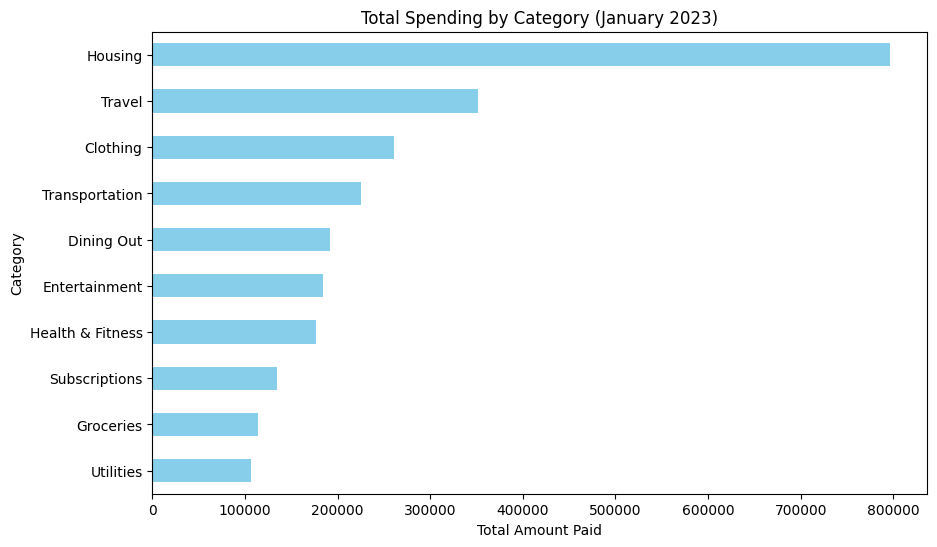

In [60]:
plt.figure(figsize=(10, 6))

category_totals = df_1.groupby('Category')['Amount Paid'].sum().sort_values()

category_totals.plot(kind='barh', color='skyblue')

plt.title('Total Spending by Category (January 2023)')

plt.xlabel('Total Amount Paid')

plt.ylabel('Category')

plt.show()

### 2. Spending By Payment Mode.

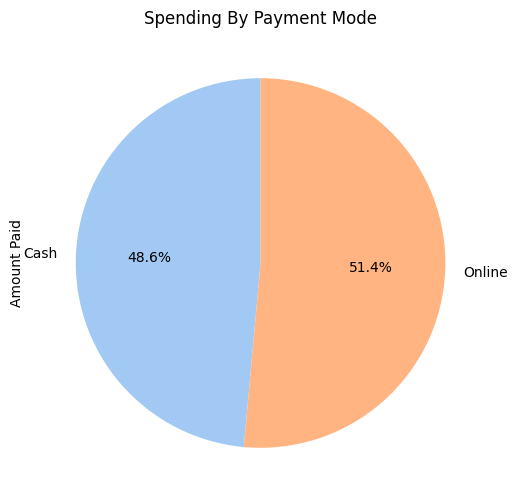

In [61]:
plt.figure(figsize=(12,6))

payment_mode_spending =df_1.groupby('Payment Mode')['Amount Paid'].sum()

payment_mode_spending.plot(kind='pie', autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette("pastel"))

plt.title('Spending By Payment Mode')

plt.show()

### Bar Plot

### 3. Total Spending By Description.



In [65]:
description_counts = df_1['Description'].value_counts()

print("Frequency of each description:")

print(description_counts)

Frequency of each description:
Description
Coffee Shop Visit                  124
Dinner At A Restaurant              51
Gym Membership                      28
Home Security System                21
Software Licenses                   18
                                  ... 
Underwear And Socks                  5
Snacks From A Convenience Store      5
Rent Payment                         4
Car Insurance                        4
Toll Charges                         3
Name: count, Length: 100, dtype: int64


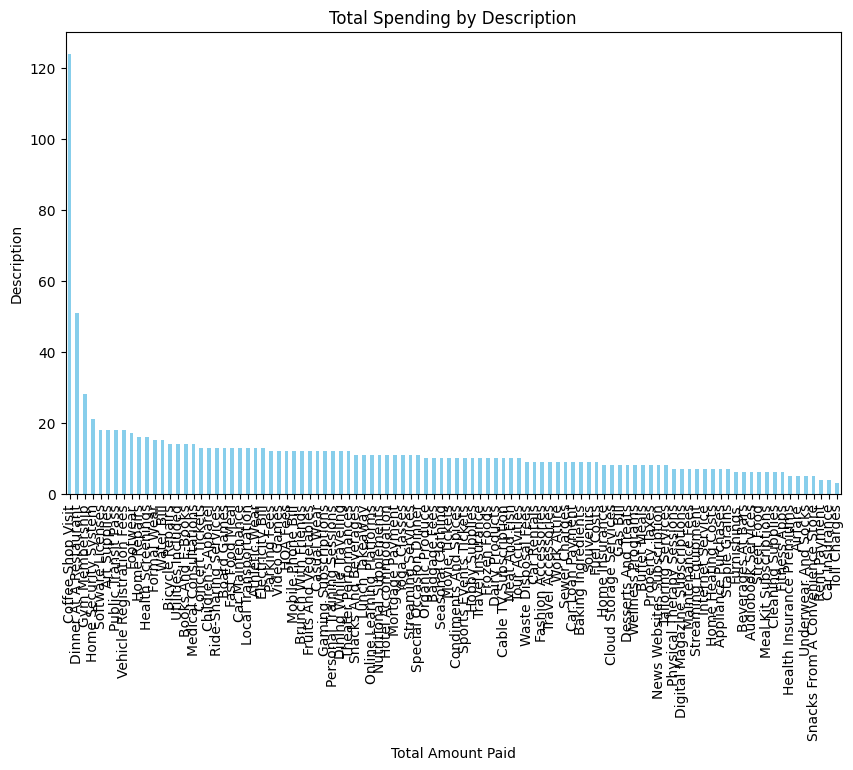

In [67]:
# visualization Of Total Spending By Description
plt.figure(figsize=(10, 6))

description_counts.plot(kind='bar', color='skyblue')

plt.title('Total Spending by Description')

plt.xlabel('Total Amount Paid')

plt.ylabel('Description')

plt.show()


### 3. Line Chart

### Spending Over Time

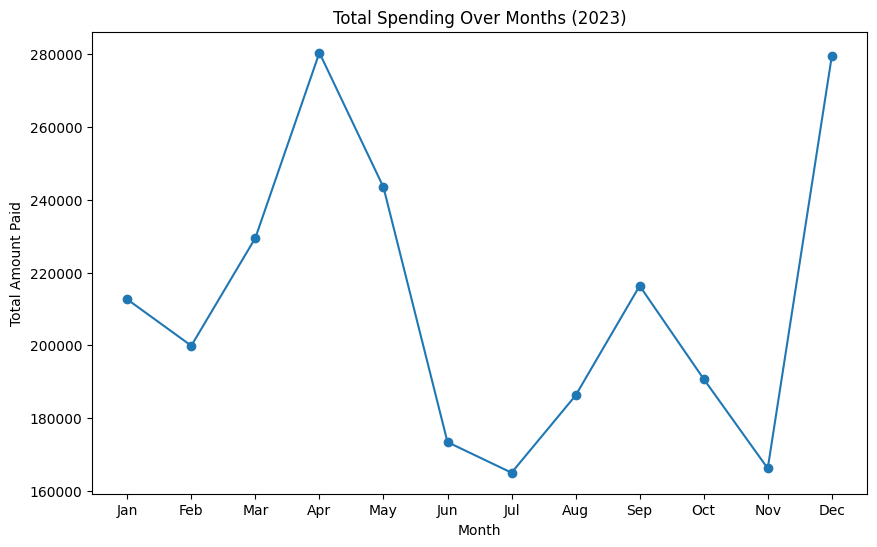

In [62]:

monthly_data = []

for month in range(1, 13):

    monthly_df = pd.read_csv(f'monthly_data_2023_{month}.csv')

    total_spent = monthly_df['Amount Paid'].sum()

    monthly_data.append(total_spent)

plt.figure(figsize=(10, 6))

plt.plot(range(1, 13), monthly_data, marker='o')

plt.title('Total Spending Over Months (2023)')

plt.xlabel('Month')

plt.ylabel('Total Amount Paid')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

### Cashback Analysis

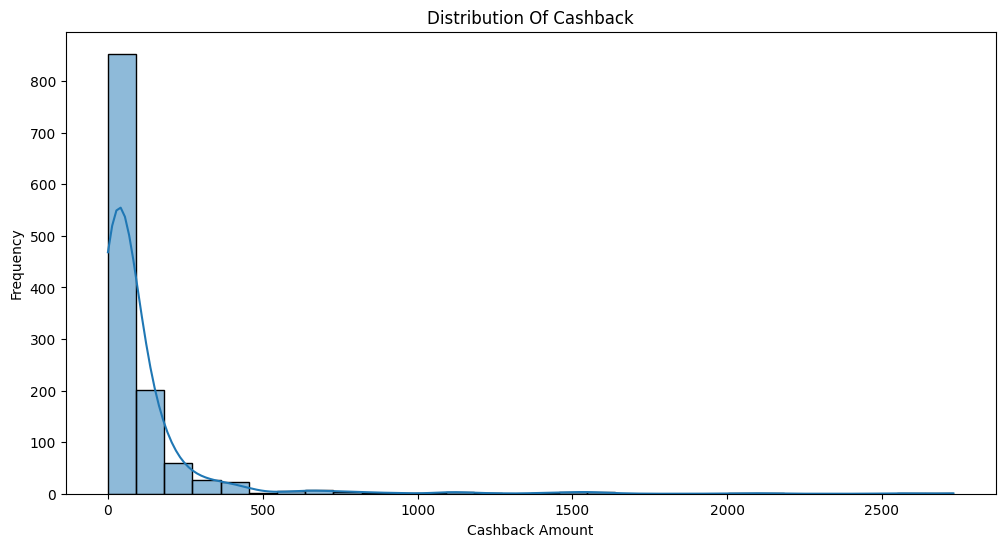

In [68]:
plt.figure(figsize=(12,6))

sns.histplot(df_1['Cashback'], bins= 30, kde= True)

plt.title('Distribution Of Cashback')

plt.xlabel('Cashback Amount')

plt.ylabel('Frequency')

plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

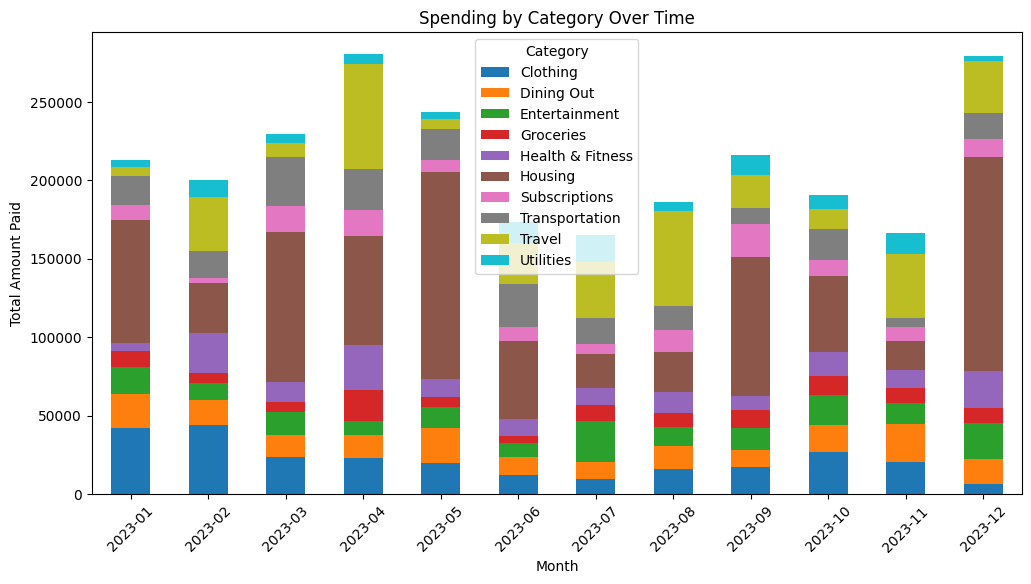

In [70]:
# Spending by Category Over Time
plt.figure(figsize=(12, 6))

category_monthly_spending = df_1.groupby([df_1['Date'].str[:7], 'Category'])['Amount Paid'].sum().unstack()

category_monthly_spending.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Spending by Category Over Time')

plt.xlabel('Month')

plt.ylabel('Total Amount Paid')

plt.xticks(rotation=45)

plt.legend(title='Category')

plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

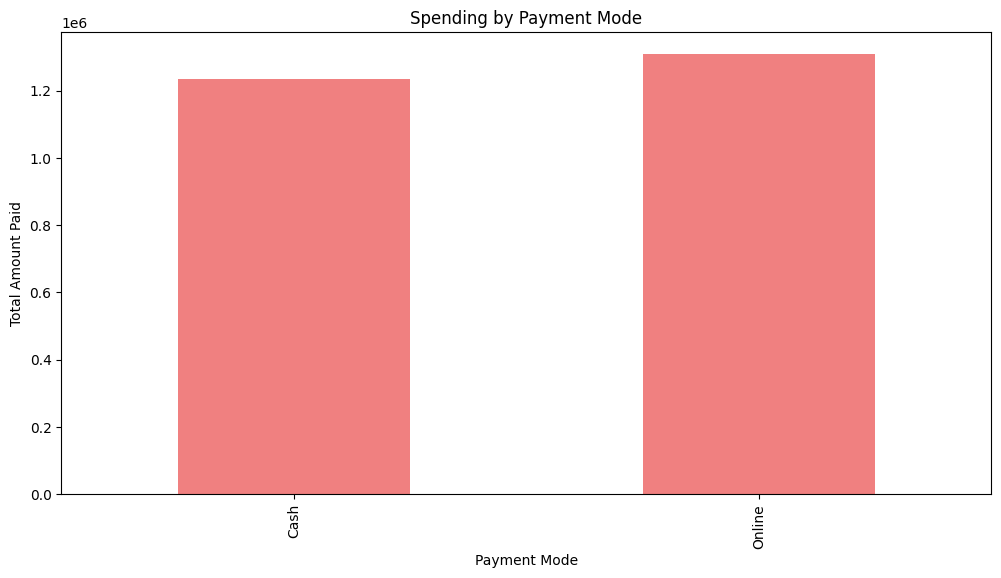

In [75]:
# Spending by Payment Mode
plt.figure(figsize=(12, 6))

payment_mode_spending = df_1.groupby('Payment Mode')['Amount Paid'].sum()

payment_mode_spending.plot(kind='bar', color='lightcoral')

plt.title('Spending by Payment Mode')

plt.xlabel('Payment Mode')

plt.ylabel('Total Amount Paid')

plt.show()

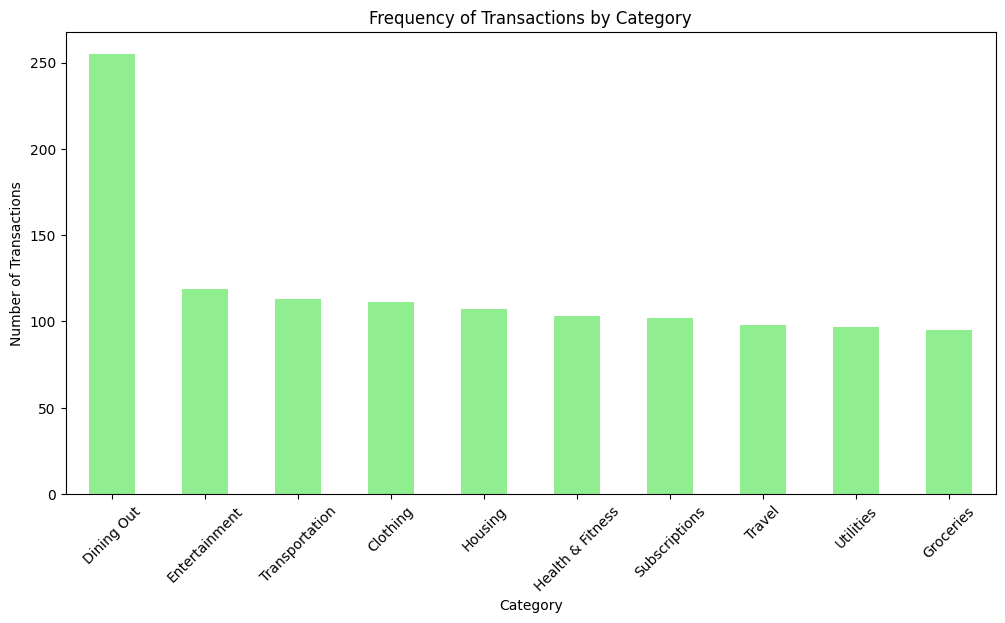

In [76]:
# Frequency of Transactions by Category
transaction_counts = df_1['Category'].value_counts()

plt.figure(figsize=(12, 6))

transaction_counts.plot(kind='bar', color='lightgreen')

plt.title('Frequency of Transactions by Category')

plt.xlabel('Category')

plt.ylabel('Number of Transactions')

plt.xticks(rotation=45)

plt.show()

In [6]:
connection.reconnect()

In [7]:
show_db_query = "SHOW DATABASES" # We pass sql queries as string.


# cursor is a pointer to a current position in a database

with connection.cursor() as cursor:
    cursor.execute(show_db_query)
    for expenses in cursor:
        print(expenses)

('information_schema',)
('mysql',)
('online_movie_rating',)
('performance_schema',)
('sailors',)
('sakila',)
('sample_database',)
('sys',)
('world',)


In [21]:
connection.reconnect()

In [22]:
# Function to create mysql table
create_db_query = "CREATE DATABASE analyze_personal_expenses"
with connection.cursor() as cursor:
    cursor.execute(create_db_query)
    for db in cursor:
        print(db)

In [23]:
# after creating the database checking wether the database has created or not.
 
show_db_query = "SHOW DATABASES" # We pass sql queries as string.


# cursor is a pointer to a current position in a database

with connection.cursor() as cursor:
    cursor.execute(show_db_query)
    for expenses in cursor:
        print(expenses)

('analyze_personal_expenses',)
('information_schema',)
('mysql',)
('online_movie_rating',)
('performance_schema',)
('sailors',)
('sakila',)
('sample_database',)
('sys',)
('world',)


In [24]:
connection.close()

In [20]:
import pandas as pd
from faker import Faker
import random
import os
import calendar

# Initialize Faker
fake = Faker()

# Function to generate monthly expenses
def generate_monthly_expenses(month, year, num_records=150):
    expenses = []
    descriptions = [
        "Grocery shopping",
        "Bus ticket",
        "Electricity bill",
        "Movie tickets",
        "Doctor's appointment",
        "Dinner at restaurant",
        "Online shopping",
        "Fuel for car",
        "Gym membership",
        "Subscription service"
    ]
    
    # Get the last day of the month
    last_day = calendar.monthrange(year, month)[1]
    
    for _ in range(num_records):
        expense = {
            'date': fake.date_between(start_date=f'{year}-{month:02d}-01', end_date=f'{year}-{month:02d}-{last_day}'),  # Adjust for month length
            'category': random.choice(['Food', 'Transport', 'Utilities', 'Entertainment', 'Healthcare']),
            'payment_mode': random.choice(['Cash', 'UPI', 'Debit Card', 'Credit Card']),
            'description': random.choice(descriptions),  # Choose a random description from the list
            'amount': round(random.uniform(5, 10000), 2),
            'cashback': round(random.uniform(0, 500), 2)  # Cashback should also be rounded
        }
        expenses.append(expense)
    return expenses

# Create a directory to store CSV files
os.makedirs('monthly_expenses', exist_ok=True)

# Generate data for 12 months
for month in range(1, 13):
    monthly_expenses = generate_monthly_expenses(month, 2023)
    df = pd.DataFrame(monthly_expenses)
    df.to_csv(f'monthly_expenses/expenses_{month:02d}.csv', index=False)

print("Monthly expense CSV files created.")

ParseError: Can't parse date string `2023-01-01`

In [20]:
"Housing": {
    "Rent Payment": (8000, 30000),
    "Mortgage Payment": (10000, 40000),
    "Property Taxes": (1000, 5000),
    "Home Insurance": (500, 2000),
    "Home Repairs": (2000, 10000),
    "HOA Fees": (500, 3000),
    "Utilities Included": (0, 2000),
    "Home Security System": (1000, 5000),
    "Furnishings": (5000, 20000),
    "Appliance Purchases": (5000, 30000)
},
"Utilities": {
    "Electricity Bill": (500, 3000),
    "Water Bill": (200, 1000),
    "Gas Bill": (300, 1500),
    "Internet Service": (500, 2000),
    "Mobile Phone Bill": (300, 1500),
    "Waste Disposal Fees": (200, 500),
    "Cable TV Subscription": (500, 2000),
    "Sewer Charges": (200, 1000),
    "Home Heating Costs": (1000, 5000),
    "Maintenance Fees": (500, 2000)
},
"Transportation": {
    "Fuel Costs": (2000, 10000),
    "Public Transit Pass": (500, 1500),
    "Car Maintenance": (1000, 5000),
    "Car Insurance": (1000, 3000),
    "Parking Fees": (200, 1000),
    "Ride-Sharing Services": (300, 2000),
    "Vehicle Registration Fees": (500, 2000),
    "Toll Charges": (100, 500),
    "Bicycle Repairs": (200, 1000),
    "Car Loan Payment": (3000, 10000)
},
"Groceries": {
    "Fruits And Vegetables": (500, 2000),
    "Meat And Fish": (1000, 5000),
    "Dairy Products": (500, 2000),
    "Staple Grains": (300, 1500),
    "Snacks And Beverages": (300, 1500),
    "Cleaning Supplies": (500, 2000),
    "Frozen Foods": (300, 1500),
    "Baking Ingredients": (200, 1000),
    "Condiments And Spices": (200, 1000),
    "Organic Produce": (500, 3000)
},
"Dining Out": {
    "Dinner At A Restaurant": (800, 3000),
    "Lunch Takeaway": (200, 800),
    "Fast Food Meal": (150, 600),
    "Coffee Shop Visit": (100, 500),
    "Brunch With Friends": (300, 1200),
    "Special Occasion Dinner": (1000, 5000),
    "Street Food": (100, 500),
    "Buffet Meals": (500, 2000),
    "Desserts And Treats": (100, 500),
    "Beverages At Bars": (300, 1500)
},
"Subscriptions": {
    "Streaming Services": (300, 1000),
    "Digital Magazine Subscriptions": (100, 500),
    "Software Licenses": (500, 2000),
    "Gym Membership": (500, 3000),
    "Online Learning Platforms": (500, 5000),
    "Cloud Storage Services": (100, 500),
    "Meal Kit Subscriptions": (1000, 3000),
    "Gaming Subscriptions": (300, 1500),
    "Audiobook Services": (300, 1000),
    "News Websites Subscription": (200, 1000)
},
"Health & Fitness": {
    "Gym Membership": (500, 3000),
    "Medical Consultations": (500, 5000),
    "Health Insurance Premiums": (1000, 5000),
    "Yoga Classes": (200, 1000),
    "Nutritional Supplements": (500, 2000),
    "Physical Therapy Sessions ```json
": (500, 3000),
    "Wellness Programs": (300, 1500),
    "Health Screenings": (500, 2000),
    "Personal Training Sessions": (1000, 5000),
    "Fitness Apps": (100, 500)
},
"Entertainment": {
    "Movie Tickets": (200, 800),
    "Concert Tickets": (500, 3000),
    "Hobby Supplies": (200, 1500),
    "Video Games": (1000, 5000),
    "Books And E-Books": (200, 1000),
    "Board Games": (500, 2000),
    "Streaming Equipment": (1000, 5000),
    "Theater Performances": (500, 3000),
    "Art Supplies": (300, 1500),
    "Sports Events Tickets": (500, 3000)
},
"Clothing": {
    "Casual Wear": (500, 3000),
    "Work Attire": (1000, 5000),
    "Footwear": (500, 3000),
    "Fashion Accessories": (200, 1000),
    "Seasonal Clothing": (1000, 5000),
    "Athletic Wear": (500, 3000),
    "Formal Wear": (2000, 10000),
    "Underwear And Socks": (200, 1000),
    "Children's Apparel": (500, 3000),
    "Tailoring Services": (200, 1000)
},
"Travel": {
    "Airfare": (3000, 50000),
    "Hotel Accommodation": (1000, 20000),
    "Car Rentals": (1000, 5000),
    "Tour Activities": (500, 5000),
    "Travel Insurance": (500, 3000),
    "Dining While Traveling": (500, 3000),
    "Souvenirs": (200, 2000),
    "Local Transportation": (100, 1000),
    "Baggage Fees": (500, 2000),
    "Travel Accessories": (500, 5000)
}

SyntaxError: illegal target for annotation (4014095979.py, line 1)